In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


In [2]:
data = pd.read_csv(r"D:\Intellipaat\lms assignments\datasets\Project-Dataset.csv\creditcard.csv.crdownload")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.00,0.0


In [3]:
data.isna().sum().sum()
data = data.dropna()

In [4]:
data.isnull().values.any()

False

In [5]:
data["Amount"].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [6]:
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  11615
Number of Fraud transactions:  49
Percentage of Fraud transactions: 0.4201


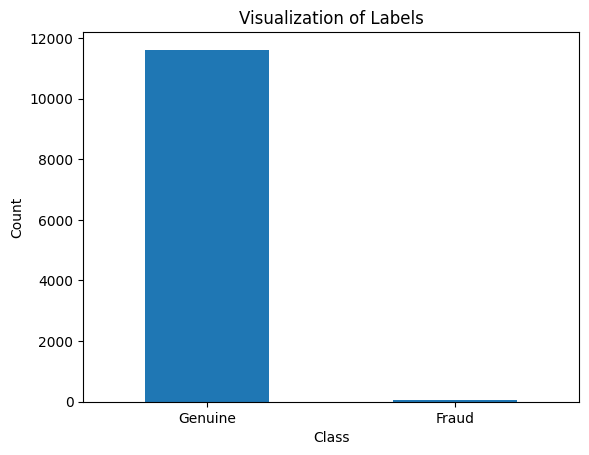

In [7]:
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [8]:
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = data["Class"]
X = data.drop(["Class"], axis= 1)

C:\Users\mahes\AppData\Local\Temp\ipykernel_42120\3195871508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
C:\Users\mahes\AppData\Local\Temp\ipykernel_42120\3195871508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["Amount", "Time"], inplace= True, axis= 1)


In [9]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (8164, 29)
Shape of test_X:  (3500, 29)


In [10]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators= 100)

In [11]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.91428571428571
Decision Tree Score:  99.82857142857144


In [12]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [13]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [14]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [15]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[3481    3]
 [   3   13]]


In [16]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99829
Precision: 0.81250
Recall: 0.81250
F1-score: 0.81250
